# Project: Investigate a No-show appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction:
> **Tip**: A person makes a doctor appointment, receives all the instructions and no-show. Who to blame:
>The gender of the patient? The age category he is in? the neighborhood where he lives?
   
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
The dataset contains:
 - PatientId: Identification of a patient
 - AppointmentID: Identification of each appointment
 - Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
 - AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
 - ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
 - Age: How old is the patient.
 - Neighbourhood: Where the appointment takes place.
 - Scholarship: True of False . 
 - Hipertension: True or False
 - Diabetes: True or False
 - Alcoholism: True or False
 - Handcap: True or False
 - SMS_received: 1 or more messages sent to the patient.
 - No-show: True or False.

## Questions we are trying to answer :
1. What is the overall appointment show-up vs. no show-up rate?
2. Does the gender of the patient affect the output?
3. Does the age category of the patient affect the output?
4. Is there a relation between the interval days to the appointment and the rate of show_up?

In [1]:
# import the libraries we are going to work with
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: check for null values,columns with no meaning,check for duplicated values and change the type of each column according to how we will use it.
### General Properties:
#### 1. From the first to look to the data there is no missing values in any columns.Also the PatientId and the AppointementId doesn't provide any additional information so we are gonna to drop them.

In [2]:
# import the dataset and get some info about it
no_show_df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
no_show_df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
no_show_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2. Change the type of ['ScheduledDay','AppointmentDay'] from object to datetime

In [5]:
no_show_df['ScheduledDay']=pd.to_datetime(no_show_df['ScheduledDay'])
no_show_df['AppointmentDay']=pd.to_datetime(no_show_df['AppointmentDay'])
no_show_df['ScheduledDay']=no_show_df['ScheduledDay'].apply(lambda x: x.strftime('%Y-%m-%d'))
no_show_df['AppointmentDay']=no_show_df['AppointmentDay'].apply(lambda x: x.strftime('%Y-%m-%d'))
no_show_df['ScheduledDay']=pd.to_datetime(no_show_df['ScheduledDay'])
no_show_df['AppointmentDay']=pd.to_datetime(no_show_df['AppointmentDay'])
no_show_df.info()
display(no_show_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hipertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handcap         110527 non-null  int64         
 10  SMS_received    110527 non-null  int64         
 11  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 3. Check for unique values for each column

In [6]:
for column in no_show_df.columns:
    print(column+": ")
    print(no_show_df[column].unique())

Gender: 
['F' 'M']
ScheduledDay: 
['2016-04-29T00:00:00.000000000' '2016-04-27T00:00:00.000000000'
 '2016-04-26T00:00:00.000000000' '2016-04-28T00:00:00.000000000'
 '2016-04-25T00:00:00.000000000' '2016-04-20T00:00:00.000000000'
 '2016-03-31T00:00:00.000000000' '2016-04-19T00:00:00.000000000'
 '2016-04-06T00:00:00.000000000' '2016-04-18T00:00:00.000000000'
 '2016-04-11T00:00:00.000000000' '2016-04-12T00:00:00.000000000'
 '2016-04-15T00:00:00.000000000' '2016-04-01T00:00:00.000000000'
 '2016-04-05T00:00:00.000000000' '2016-04-08T00:00:00.000000000'
 '2016-04-14T00:00:00.000000000' '2016-04-13T00:00:00.000000000'
 '2016-04-07T00:00:00.000000000' '2016-03-17T00:00:00.000000000'
 '2016-03-30T00:00:00.000000000' '2016-03-29T00:00:00.000000000'
 '2016-03-18T00:00:00.000000000' '2016-03-28T00:00:00.000000000'
 '2016-03-04T00:00:00.000000000' '2016-03-15T00:00:00.000000000'
 '2016-03-14T00:00:00.000000000' '2016-03-21T00:00:00.000000000'
 '2016-03-23T00:00:00.000000000' '2016-03-22T00:00:00.00

#### 4. From inspecting the unique values in each column, in the age column there is -1 value which means that there is no value in it so we are going to drop the rows with -1 in age column

In [7]:
age_index=no_show_df.index[no_show_df['Age']==-1]
list(age_index)

[99832]

In [8]:
no_show_df.drop(age_index,inplace=True)

In [9]:
no_show_df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

#### 5. Now check the values between the date the appointment was fixed and the day of the appointement itself to check that all the values are reasonable (the day of the appointment is after the Secheduled Day) and if there is non reasonable data drop it.


In [10]:
no_show_df['IntervalDay'] =  no_show_df['AppointmentDay']-no_show_df['ScheduledDay']
no_show_df['IntervalDay'] = no_show_df['IntervalDay'].astype(str).str[:2]
no_show_df['IntervalDay'] = pd.to_numeric(no_show_df['IntervalDay'])
no_show_df['IntervalDay'].unique()

array([ 0,  2,  3,  1,  4,  9, 29, 10, 23, 11, 18, 17, 14, 28, 24, 21, 15,
       16, 22, 43, 30, 31, 42, 32, 56, 45, 46, 39, 37, 38, 44, 50, 60, 52,
       53, 65, 67, 91, 66, 84, 78, 87, 63, 70, 72, 57, 58, 51, 59, 41, 49,
       73, 64, 20, 33, 34,  6, 35, 36, 12, 13, 40, 47,  8,  5,  7, 25, 26,
       48, 27, 19, 61, 55, 62, 54, 77, 69, 83, 76, 89, 81, 79, 68, 75, 85,
       -1, 80, 86, 98, 94, 96, 88, 90, 74, 71, 82, 92, 97, 93, 95, -6])

In [11]:
day_index=no_show_df.index[no_show_df['IntervalDay']<0]
day_index

Int64Index([27033, 55226, 64175, 71533, 72362], dtype='int64')

In [12]:
no_show_df.iloc[day_index]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,IntervalDay
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [13]:
no_show_df.drop(day_index,inplace=True)

In [14]:
no_show_df['IntervalDay'].unique()

array([ 0,  2,  3,  1,  4,  9, 29, 10, 23, 11, 18, 17, 14, 28, 24, 21, 15,
       16, 22, 43, 30, 31, 42, 32, 56, 45, 46, 39, 37, 38, 44, 50, 60, 52,
       53, 65, 67, 91, 66, 84, 78, 87, 63, 70, 72, 57, 58, 51, 59, 41, 49,
       73, 64, 20, 33, 34,  6, 35, 36, 12, 13, 40, 47,  8,  5,  7, 25, 26,
       48, 27, 19, 61, 55, 62, 54, 77, 69, 83, 76, 89, 81, 79, 68, 75, 85,
       80, 86, 98, 94, 96, 88, 90, 74, 71, 82, 92, 97, 93, 95])

#### 5. Now let's correct the column names and make them follow thwe same convention

In [15]:
correction = {'Neighbourhood': 'Neighborhood', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_Show'}
no_show_df.rename(columns=correction, inplace=True)

In [16]:
no_show_df.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,IntervalDay
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2


#### 6. Change the Gender column from object to integer variable wher 1 represents male and 0 represents a female

In [17]:
no_show_df['IS_Male'] = no_show_df['Gender'].map({'M': 1, 'F': 0})
no_show_df['Gender'] = no_show_df['Gender'].map({'M': 'Male', 'F': 'Female'})

In [18]:
no_show_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,IntervalDay,IS_Male
0,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0
1,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1
2,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0
3,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0
4,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0


#### 7. Categorize the patients according to their age into (children-youth-adults-seniors)

In [19]:
no_show_df['Age_category'] = pd.cut(no_show_df['Age'],bins=[-1, 14, 24, 64, 130],labels=['children','youth','adult','senior'])

In [20]:
no_show_df.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,IntervalDay,IS_Male,Age_category
0,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0,adult
1,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1,adult
2,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0,adult
3,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0,children
4,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0,adult
5,Female,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2,0,senior
6,Female,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2,0,youth
7,Female,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2,0,adult
8,Female,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0,0,youth
9,Female,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2,0,youth


In [21]:
no_show_df['Age_category'].dtype

CategoricalDtype(categories=['children', 'youth', 'adult', 'senior'], ordered=True)

#### 8. Check if there is duplicated values in the dataset

In [22]:
sum(no_show_df.duplicated(subset=None))

8070

In [23]:
duplicate_index=no_show_df.index[no_show_df.duplicated(subset=None)]

In [24]:
duplicate_index

Int64Index([    52,     99,    110,    154,    210,    308,    310,    344,
               365,    369,
            ...
            110494, 110497, 110500, 110503, 110504, 110505, 110507, 110510,
            110513, 110514],
           dtype='int64', length=8070)

In [25]:
no_show_df.drop(duplicate_index,inplace=True)

In [26]:
sum(no_show_df.duplicated())

0

In [27]:
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102451 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          102451 non-null  object        
 1   ScheduledDay    102451 non-null  datetime64[ns]
 2   AppointmentDay  102451 non-null  datetime64[ns]
 3   Age             102451 non-null  int64         
 4   Neighborhood    102451 non-null  object        
 5   Scholarship     102451 non-null  int64         
 6   Hypertension    102451 non-null  int64         
 7   Diabetes        102451 non-null  int64         
 8   Alcoholism      102451 non-null  int64         
 9   Handicap        102451 non-null  int64         
 10  SMS_received    102451 non-null  int64         
 11  No_Show         102451 non-null  object        
 12  IntervalDay     102451 non-null  int64         
 13  IS_Male         102451 non-null  int64         
 14  Age_category    102451 non-null  cat

In [28]:
no_show_df['Age_category'].isnull().sum()

0

In [29]:
no_show_df['Showed']=no_show_df['No_Show'].map({'No': 1, 'Yes': 0})
no_show_df['no_Showed']=no_show_df['No_Show'].map({'No': 0, 'Yes': 1})
no_show_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,IntervalDay,IS_Male,Age_category,Showed,no_Showed
0,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0,adult,1,0
1,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1,adult,1,0
2,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0,adult,1,0
3,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0,children,1,0
4,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0,adult,1,0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What is the overall appointment show-up vs. no show-up rate?)

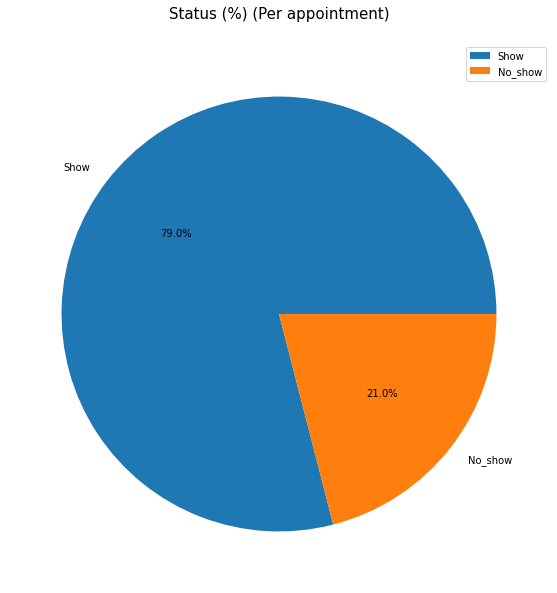

In [30]:
labels=['Show','No_show']
rate = no_show_df['Showed'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(x=rate,labels=labels,autopct='%1.1f%%')
plt.title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();

##### As we can see from this plot our data is imbalanced so while evaluating a model of prediction for our data we have to make sure that it passes the most common class model which predicts 1 for all the data (accuarcy>79%).

### Research Question 2 (Does the gender of the patient affect the output?)

Text(0.5, 1.0, 'Show up according to Gender')

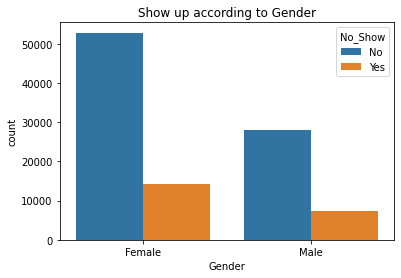

In [31]:
sns.countplot(x='Gender',hue='No_Show',data=no_show_df).set_title('Show up according to Gender')

##### from the plot we can see tht more females tend to not show up more than men but also the number of females that make appointements is higher than the males

### Research Question 3 (Does the age category of the patient affect the output?)

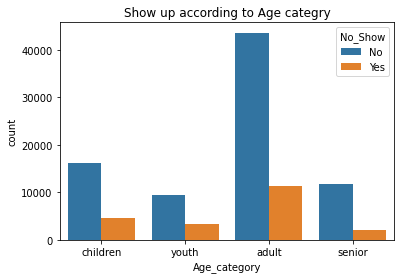

In [32]:
fig=sns.countplot(x='Age_category',hue='No_Show',data=no_show_df).set_title('Show up according to Age categry')

##### As we can see from this plot more adults tend to not show up to their doctors appointement more than any other age category

### Research Question 4 (Is there a relation between the interval days to the appointment and the rate of show_up?)

Text(0, 0.5, 'Count of people')

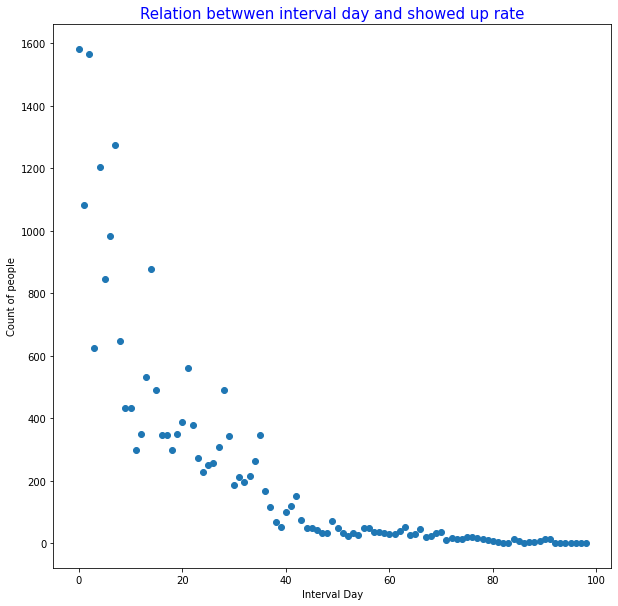

In [33]:
interval_day_df=no_show_df.groupby('IntervalDay')['no_Showed'].sum().reset_index()
plt.figure(figsize=(10,10))
plt.scatter(x=interval_day_df['IntervalDay'],y=interval_day_df['no_Showed'])
plt.title('Relation betwwen interval day and showed up rate',fontsize = 15,color='b')
plt.xlabel('Interval Day')
plt.ylabel('Count of people')

##### As we can see here the rate trend follows certain quadratic function so as the interval day increases the number of patients who don't show up decreases.

## Limitations:
- Missing features that could be useful to get more sure what is the most feature that impacts showing to the appointment such as if the patient is employeed or not ,or whether the patient have a series medical issue or not, or the number of times each patient make a checkup a year.
- There we some illogical data such as patients with age 0 or less
- There is some illogical data in appointement day before the scheduled day where we reserve the appointment
- There is a large amount of duplicated data which affects the entire data set


<a id='conclusions'></a>
## Conclusions

1. As we can see about 21.0% of people that schedule an appointment did not make it to thier appointment

2. The sex of the patient affects the No_show output as more females tend to miss the appointment

3. The age_category of the patient affects the No_show output as more adults tend to miss the appointment

4. the number of patients that show up at their appointment increases as the interval to the appointment day increases